# Exercise 6. Missing values. Solution

In [1]:
# Import libraries
# Importar bibliotecas

In [13]:
import pandas as pd
import numpy as np

In [ ]:
# Load de titanic dataset
# Cargar el conjunto de datos del Titanic

In [14]:
titanic = pd.read_csv('../datasets/titanic_train.csv')

In [ ]:
# Check the types of variables in the dataset and see if there are null values
# Verifique los tipos de variables en el conjunto de datos y vea si hay valores nulos

In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Shows the number of null values per variable
# Muestra el número de valores nulos por variable

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Create a new dataset that does not have rows with null values (delete rows)
# Cree un nuevo conjunto de datos que no tenga filas con valores nulos (elimine filas)

In [20]:
titanic_sen_filas_null = titanic.dropna()

In [ ]:
# Calculate the number of deleted rows 
# Calcular el número de filas eliminadas

In [21]:
filas_eliminadas = titanic['PassengerId'].count() - titanic_sen_filas_null['PassengerId'].count()
print(f'Filas eliminadas: {filas_eliminadas}')

Filas eliminadas: 708


In [ ]:
# Create a new dataset without columns with more than 10 nulls
# Cree un nuevo conjunto de datos sin columnas con más de 10 nulos

In [22]:
nrows, ncols = titanic.shape
titanic_sen_columnas = titanic.dropna(axis=1,thresh=(nrows-10))
titanic_sen_columnas.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Calculates the number of deleted columns
# Calcula el número de columnas eliminadas

In [23]:
columnas_eliminadas = len(titanic.columns) - len(titanic_sen_columnas.columns)
print(f'Columnas eliminadas: {columnas_eliminadas}')

Columnas eliminadas: 2


In [ ]:
# Create a new dataset from the original one with the following changes:
# Replace the null values in the age column ('Age') by the average of the ages in the rest of the dataset.
# Replace null values in the variable "Embarked" by the most frequent value in the variable
# Eliminates columns with null values

In [ ]:
# Cree un nuevo conjunto de datos a partir del original con los siguientes cambios:
# Reemplace los valores nulos en la columna de edad ("Edad") por el promedio de las edades en el resto del conjunto de datos.
# Reemplazar valores nulos en la variable "Embarcado" por el valor más frecuente en la variable
# Elimina columnas con valores nulos

<Axes: xlabel='Embarked', ylabel='count'>

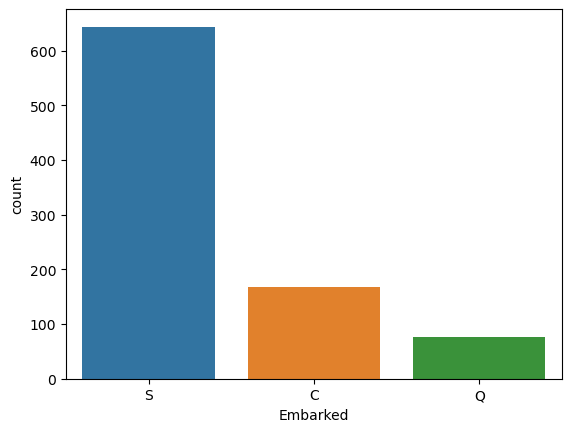

In [24]:
import seaborn as sns
sns.countplot(data=titanic,x='Embarked')

In [25]:
titanic.Embarked.describe().top

'S'

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
nuevo_titanic = titanic.copy()
nuevo_titanic['Age'] = nuevo_titanic[['Age']].apply(lambda x: x.fillna(x.mean()),axis=0)
nuevo_titanic['Embarked'] = nuevo_titanic[['Embarked']].apply(lambda x: x.fillna(titanic.Embarked.describe().top),axis=0)
nuevo_titanic.dropna(axis=1,inplace=True)

In [29]:
nuevo_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# Load or a dataset with missing values with data on travel-times
# https://openmv.net/info/travel-times
# datasets <- travel-times.csv

In [ ]:
# Cargar o un conjunto de datos con valores faltantes con datos sobre tiempos de viaje
# https://openmv.net/info/travel-times
# conjuntos de datos <- tiempos-de-viaje.csv

In [31]:
travel_times = pd.read_csv('../datasets/travel-times.csv')

In [ ]:
# Show data types
# Mostrar tipos de datos

In [32]:
travel_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB


In [34]:
travel_times.columns

Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Take407All', 'Comments'],
      dtype='object')

In [ ]:
# Show number of null values
# Mostrar número de valores nulos

In [35]:
travel_times.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [ ]:
# Eliminates columns with more than half of nulls
# Elimina columnas con más de la mitad de nulos

In [36]:
travel_times.dropna(axis=1,thresh=(travel_times.Date.count()/2),inplace=True)
travel_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [37]:
travel_times.isnull().sum()

Date               0
StartTime          0
DayOfWeek          0
GoingTo            0
Distance           0
MaxSpeed           0
AvgSpeed           0
AvgMovingSpeed     0
FuelEconomy       17
TotalTime          0
MovingTime         0
Take407All         0
dtype: int64

In [ ]:
# Replace the null values using the value of the previous row.
# Check if the result was as expected

In [ ]:
# Reemplazar los valores nulos usando el valor de la fila anterior.
# Comprobar si el resultado fue el esperado

In [38]:
travel_times.fillna(method='ffill',inplace=True)
travel_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     199 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


/tmp/ipykernel_107612/346459191.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  travel_times.fillna(method='ffill',inplace=True)


In [39]:
travel_times.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       6
TotalTime         0
MovingTime        0
Take407All        0
dtype: int64

In [ ]:
# Hay un problema porque los primeros valores son NaN
# Reemplazarlos usando el valor de la fila siguiente.

In [41]:
travel_times.fillna(method='bfill',inplace=True)

/tmp/ipykernel_107612/139323450.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  travel_times.fillna(method='bfill',inplace=True)


In [42]:
travel_times

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,-,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,-,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,-,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,-,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,-,36.8,34.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No
201,7/14/2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes
202,7/13/2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,7.89,54.2,40.6,Yes
203,7/12/2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,7.89,51.9,36.5,Yes


In [43]:
travel_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [44]:
travel_times.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       0
TotalTime         0
MovingTime        0
Take407All        0
dtype: int64